In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D
from keras.optimizers import RMSprop, Adam, Adadelta

from keras.layers import Conv2D, MaxPooling2D
import tensorflow as tf
import cv2

In [0]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pickle
DATA_PATH = "/content/drive/My Drive"

In [0]:
infile = open(DATA_PATH+"/X_train.pkl",'rb')
x = pickle.load(infile)
infile = open(DATA_PATH+"/y_train.pkl",'rb')
y = pickle.load(infile)

In [0]:
y[2800]
y = y/5

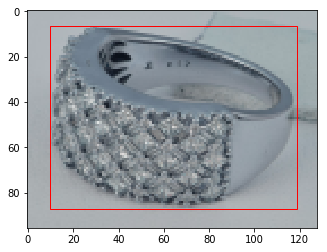

array([  0.2, 127.4,  18.2,  84.6])

In [0]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
i=2800

plt.imshow(x[i], interpolation='nearest')
plt.gca().add_patch(Rectangle((y[i][0],y[i][2]),abs(y[i][1]-y[i][0]),abs(y[i][3]-y[i][2]),linewidth=1,edgecolor='r',facecolor='none'))
plt.show()
y[300]

In [0]:
infile = open(DATA_PATH+"/x_test.pickle",'rb')
x_test = pickle.load(infile)
x_test=x_test-np.mean(x_test)
x_test=x_test/np.std(x_test)

In [0]:
y[:, [0,1]] = y[:, [0,1]]/128
y[:, [2,3]] = y[:, [2,3]]/96

In [0]:
x=x-np.mean(x)
x=x/np.std(x)

In [0]:
x = x/255

In [0]:
model=Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(96,128,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='relu'))
model.compile(loss='mse', optimizer=Adam(), metrics = ["accuracy"])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 94, 126, 32)       896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 47, 63, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 47, 63, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 45, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 22, 30, 64)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 22, 30, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 20, 28, 64)        36928     
__________

In [0]:
model.fit(x_train, y_train, batch_size=50, nb_epoch=20, verbose=1, validation_split=0.1 )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':
W0709 17:17:47.426573 139894981609344 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 13000 samples, validate on 1000 samples
Epoch 1/20
13000/13000 [==============================] - 281s 22ms/step - loss: 0.0325 - acc: 0.6736 - val_loss: 0.0349 - val_acc: 0.7960
Epoch 2/20
13000/13000 [==============================] - 280s 22ms/step - loss: 0.0085 - acc: 0.8113 - val_loss: 0.0324 - val_acc: 0.8350
Epoch 3/20
13000/13000 [==============================] - 278s 21ms/step - loss: 0.0074 - acc: 0.8238 - val_loss: 0.0290 - val_acc: 0.8410
Epoch 4/20
13000/13000 [==============================] - 276s 21ms/step - loss: 0.0070 - acc: 0.8346 - val_loss: 0.0239 - val_acc: 0.8380
Epoch 5/20
13000/13000 [==============================] - 272s 21ms/step - loss: 0.0063 - acc: 0.8455 - val_loss: 0.0167 - val_acc: 0.8510
Epoch 6/20
13000/13000 [==============================] - 271s 21ms/step - loss: 0.0058 - acc: 0.8546 - val_loss: 0.0129 - val_acc: 0.8450
Epoch 7/20
13000/13000 [==============================] - 271s 21ms/step - loss: 0.0054 - acc: 0.8550 - val_loss: 0.0

In [0]:
y_pred=model.predict(x_valid,verbose=0)

In [0]:
y_pred[:, [0,1]] = y_pred[:, [0,1]]*128
y_pred[:, [2,3]] = y_pred[:, [2,3]]*96

In [0]:
y_pred = y_pred*5

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


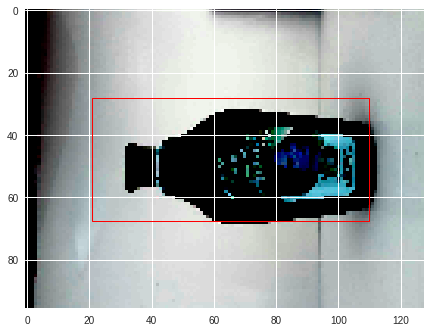

In [0]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
i=300
plt.imshow(x_test[i], interpolation='nearest')
plt.gca().add_patch(Rectangle((y_pred[i][0],y_pred[i][2]),abs(y_pred[i][1]-y_pred[i][0]),abs(y_pred[i][3]-y_pred[i][2]),linewidth=1,edgecolor='r',facecolor='none'))
plt.show()

In [0]:
df=pd.read_csv('/content/drive/My Drive/test.csv')

In [0]:
df['x1']= y_pred1[:,0]
df['x2'] = y_pred1[:,1]
df['y1'] = y_pred1[:,2]
df['y2']= y_pred1[:,3]

In [0]:
df1=pd.DataFrame(y_pred,columns=["x1", ])

,image_name,x1,x2,y1,y2
0,1474723840903DSC08089.png,193.846039,459.744873,76.032669,404.477173
1,1473231475010DeeplearnS11276.png,73.174942,574.544189,143.206329,346.651917
2,JPEG_20161205_135307_1000155917326.png,111.391296,531.867188,17.369492,440.199951
3,JPEG_20160711_123440_1000518778437.png,192.538895,455.777039,95.596298,384.658203
4,JPEG_20160803_115329_100034020722.png,108.797745,525.241638,77.354980,385.262909


In [0]:
from google.colab import files

df1.to_csv('df1.csv',index=False)
files.download('df1.csv')